In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import OneHotEncoder
from sklearn import tree
from sklearn.tree import plot_tree

In [36]:
df = pd.read_csv('data.csv')

In [37]:
print(df)

       gender   age  hypertension  heart_disease smoking_history    bmi  \
0        Male  10.0             0              0         No Info  16.83   
1      Female   3.0             0              0         No Info  27.32   
2      Female  42.0             0              0           never  24.69   
3      Female  70.0             0              0           never  27.32   
4      Female  20.0             0              0           never  18.51   
...       ...   ...           ...            ...             ...    ...   
16959  Female  65.0             1              1           never  33.55   
16960    Male  55.0             0              1          former  30.42   
16961  Female  61.0             0              0         No Info  34.45   
16962  Female  58.0             1              0           never  38.31   
16963  Female  61.0             0              0         current  30.11   

       HbA1c_level  blood_glucose_level  diabetes  
0              4.0                  155        

In [38]:
df['gender'] = df['gender'].map({'Female': 1, 'Male': 2,'Other':3})
df['smoking_history'] = df['smoking_history'].map({'never': 0, 'current': 2, 'No Info': -1,'former': 1,'No current' :-2})

In [39]:
print(df)

       gender   age  hypertension  heart_disease  smoking_history    bmi  \
0           2  10.0             0              0             -1.0  16.83   
1           1   3.0             0              0             -1.0  27.32   
2           1  42.0             0              0              0.0  24.69   
3           1  70.0             0              0              0.0  27.32   
4           1  20.0             0              0              0.0  18.51   
...       ...   ...           ...            ...              ...    ...   
16959       1  65.0             1              1              0.0  33.55   
16960       2  55.0             0              1              1.0  30.42   
16961       1  61.0             0              0             -1.0  34.45   
16962       1  58.0             1              0              0.0  38.31   
16963       1  61.0             0              0              2.0  30.11   

       HbA1c_level  blood_glucose_level  diabetes  
0              4.0                 

In [40]:
x = df.drop('diabetes', axis=1)
y = df['diabetes']


In [41]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=99)

In [42]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(criterion="gini",max_depth = 8,min_samples_split =10 ,random_state=5)

clf.fit(x_train, y_train)

RandomForestClassifier(max_depth=8, min_samples_split=10, random_state=5)

In [43]:
from sklearn.metrics import classification_report
y_pred = clf.predict(x_test)
print('Accurary:',accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accurary: 0.9030356616563513
              precision    recall  f1-score   support

           0       0.90      0.91      0.90      1698
           1       0.91      0.90      0.90      1695

    accuracy                           0.90      3393
   macro avg       0.90      0.90      0.90      3393
weighted avg       0.90      0.90      0.90      3393



In [44]:
predictions_on_original_data =clf.predict(x)
probabilities_on_original_data = clf.predict_proba(x)
print("Dự đoán cho dữ liệu gốc:")
print("Lớp dự đoán:", predictions_on_original_data)
print("Xác suất dự đoán:", probabilities_on_original_data)

Dự đoán cho dữ liệu gốc:
Lớp dự đoán: [0 0 0 ... 1 1 1]
Xác suất dự đoán: [[0.9840256  0.0159744 ]
 [0.97980333 0.02019667]
 [0.9336802  0.0663198 ]
 ...
 [0.0852331  0.9147669 ]
 [0.02206506 0.97793494]
 [0.07638755 0.92361245]]


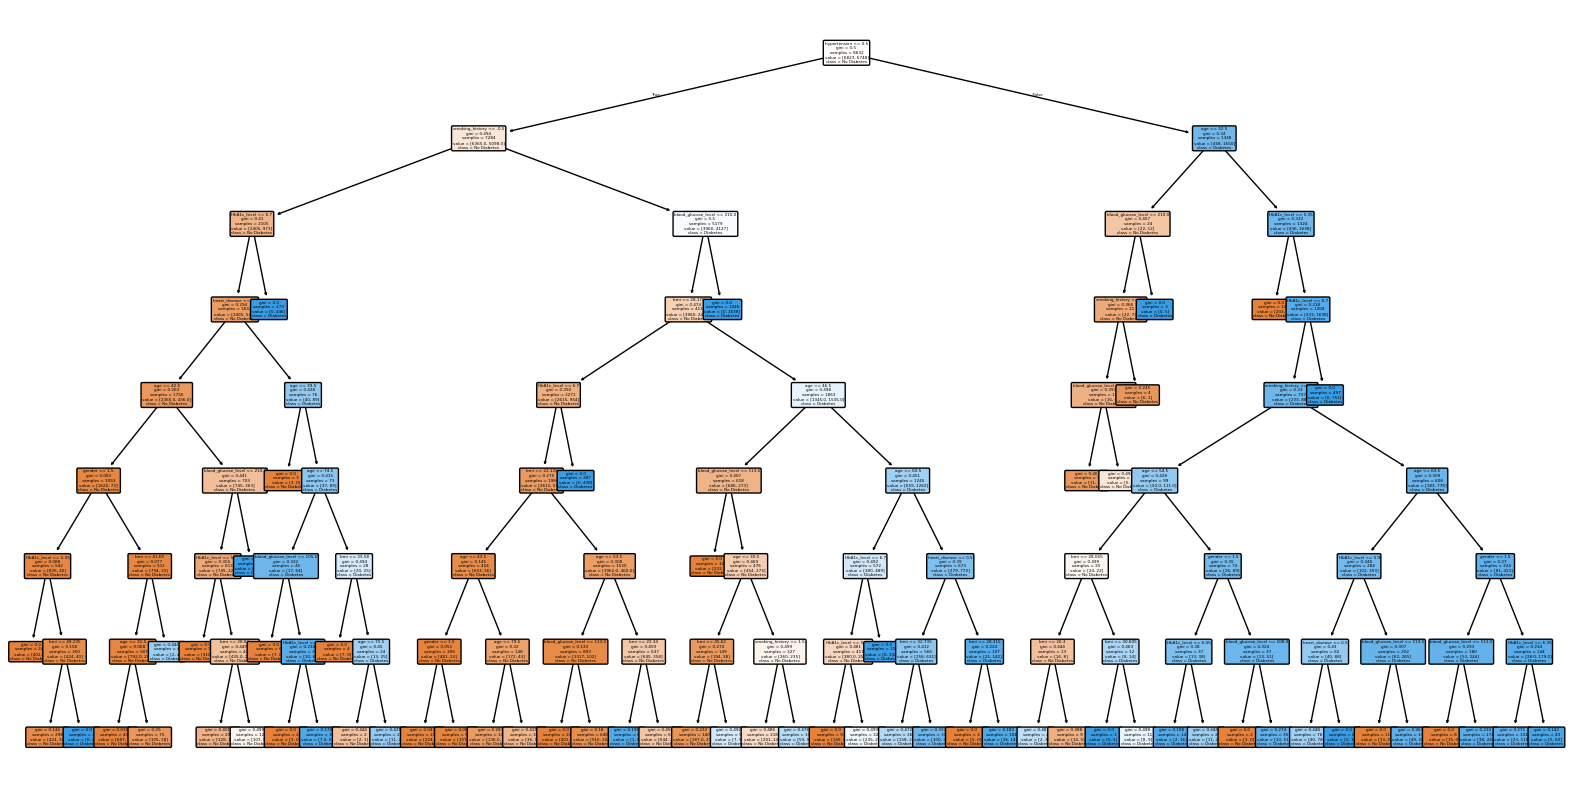

In [45]:
estimator = clf.estimators_[0]

# Vẽ cây quyết định
plt.figure(figsize=(20 ,10))
plot_tree(estimator, filled=True, feature_names=x_train.columns, class_names=['No Diabetes', 'Diabetes'], rounded=True, fontsize=3)
plt.show()

In [46]:
# Giả sử bạn đã có các nhãn thực tế và dự đoán
y_pred = clf.predict(x_test)

# Tính ma trận nhầm lẫn
cm = confusion_matrix(y_test, y_pred)

# In ra ma trận nhầm lẫn
print(cm)

[[1541  157]
 [ 172 1523]]


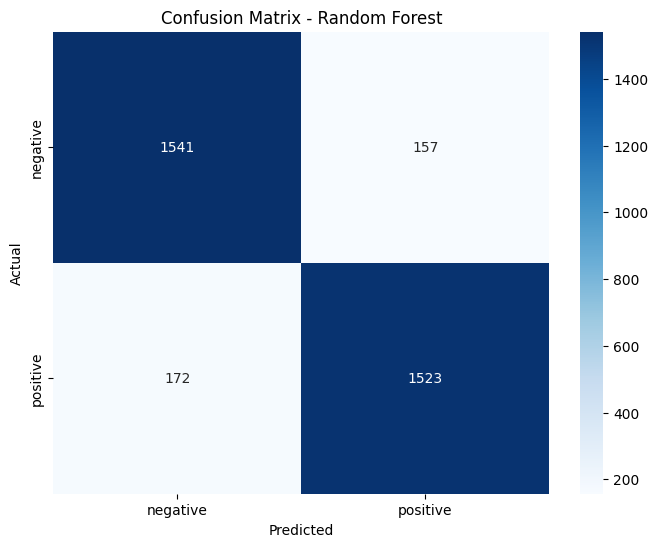

In [47]:
# Vẽ biểu đồ confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['negative', 'positive'], yticklabels=['negative', 'positive'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix - Random Forest')
plt.show()

In [48]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

In [49]:
# Dự đoán xác suất
y_prob = clf.predict_proba(x_test)[:, 1]  # Xác suất dự đoán cho lớp dương tính (1)

In [50]:
# Tính các giá trị False Positive Rate (fpr), True Positive Rate (tpr) và ngưỡng
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Tính toán AUC
auc_score = roc_auc_score(y_test, y_prob)

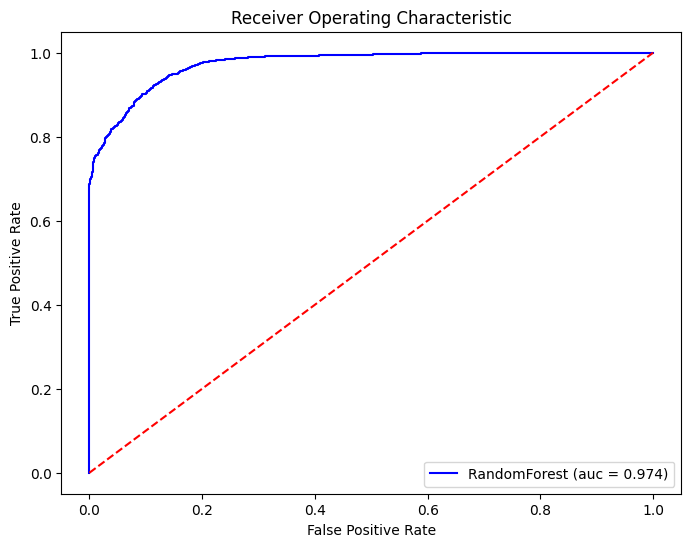

In [51]:
# Vẽ biểu đồ ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'RandomForest (auc = {auc_score:.3f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Đường chéo tham chiếu
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()
